**Crop Yield Prediction using Machine Learning**

**Importing Libraries**

In [63]:
# Install all required libraries
!pip install statsmodels seaborn plotly xgboost catboost lightgbm scikit-learn

# Importing Libraries
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Machine learning library and performance metrices**

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

**Loading Dataset**

In [65]:
df = pd.read_csv("C:/Users/RIMPA DAS/Desktop/Crop Yeild Prediction/crop_yield.csv")

In [66]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.00,2000,1498.00,395200.00,1160.00,0.50
19685,Wheat,1998,Rabi,Nagaland,1000.00,3000,1498.00,98800.00,290.00,3.00
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00,440900,1356.20,29586735.11,96373.73,1.28
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00,5488,1356.20,26242746.82,85481.26,0.02
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00,392160,1356.20,22778368.48,74196.64,1.26


In [67]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
18726,Maize,2008,Kharif,Sikkim,39200.00,65740,2247.50,5607168.00,3528.00,1.80
8142,Small millets,2002,Kharif,Madhya Pradesh,605458.00,87520,800.80,57318708.86,151364.50,0.21
4202,Rapeseed &Mustard,2014,Rabi,Assam,281006.00,187522,1899.00,42420665.76,92731.98,0.63
13532,Moong(Green Gram),2013,Summer,Uttarakhand,10.00,5,1735.40,1444.90,2.70,0.50
7565,Other Rabi pulses,2001,Rabi,Gujarat,2400.00,1400,666.50,245112.00,624.00,0.59


**First character of each word in a string to uppercase and all remaining characters to lowercase.**

In [68]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

**Basic Understanding of Data and Data Analysis**

In [69]:
#Checking Dimensions of the Data
df.shape

(19689, 10)

In [70]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [71]:
#Feature Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [72]:
#Descriptive Statistics Analysis
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00,2009.13,6.50,1997.00,2004.00,2010.00,2015.00,2020.00
Area,19689.00,179926.57,732828.68,0.50,1390.00,9317.00,75112.00,50808100.00
Production,19689.00,16435941.27,263056839.81,0.00,1393.00,13804.00,122718.00,6326000000.00
Annual_Rainfall,19689.00,1437.76,816.91,301.30,940.70,1247.60,1643.70,6552.70
Fertilizer,19689.00,24103312.45,94946004.48,54.17,188014.62,1234957.44,10003847.20,4835406877.00
Pesticide,19689.00,48848.35,213287.35,0.09,356.70,2421.90,20041.70,15750511.00
Yield,19689.00,79.95,878.31,0.00,0.60,1.03,2.39,21105.00


In [73]:
#Descriptive statistics for all categorical columns in the dataset.
df.describe(include=["object"]).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


In [74]:
#Checking NaN values in our Dataset
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [75]:
#Checking Duplicate Values
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


In [76]:
#Separate numerical and categorical variable
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,1997,796.00,22,2051.40,75755.32,246.76,0.24
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42


In [77]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


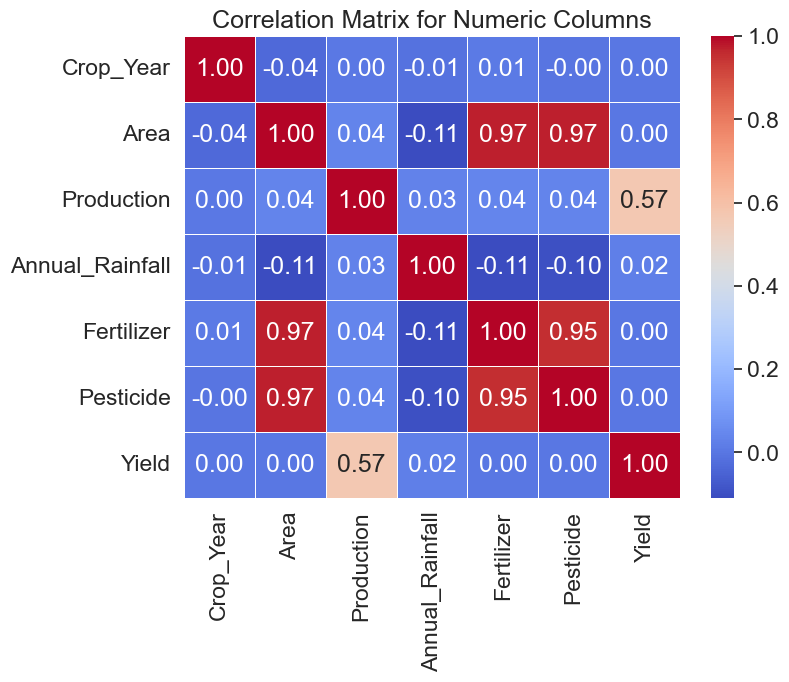

In [78]:
#Correlation matrix for numeric columns
numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Columns")
plt.show()


In [79]:
#Count details for each crop year
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64

In [80]:
#Remove records for Year 2020
df = df[df['Crop_Year'] != 2020]


In [81]:
#Count details for each Crops
df['Crop'].value_counts(ascending=False)

Crop
Rice                     1195
Maize                     973
Moong(Green Gram)         738
Urad                      731
Groundnut                 724
Sesamum                   684
Potato                    626
Sugarcane                 604
Wheat                     544
Rapeseed &Mustard         527
Bajra                     524
Jowar                     513
Arhar/Tur                 507
Ragi                      497
Gram                      489
Small Millets             484
Cotton(Lint)              476
Onion                     453
Sunflower                 439
Dry Chillies              419
Other Kharif Pulses       381
Horse-Gram                370
Peas & Beans (Pulses)     368
Tobacco                   363
Other  Rabi Pulses        354
Soyabean                  348
Turmeric                  336
Masoor                    323
Ginger                    323
Linseed                   308
Castor Seed               300
Barley                    296
Sweet Potato              273
Garli

In [82]:
#Count details for each Season
df['Season'].value_counts(ascending=False)

Season
Kharif         8215
Rabi           5732
Whole Year     3712
Summer         1190
Autumn          414
Winter          389
Name: count, dtype: int64

In [83]:
#Count Details for each State
df['State'].value_counts(ascending=False)

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Odisha                760
Assam                 731
Uttarakhand           727
Nagaland              689
Puducherry            670
Meghalaya             649
Jammu And Kashmir     631
Haryana               631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Punjab                397
Telangana             397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

In [84]:
#Crop yield per state
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


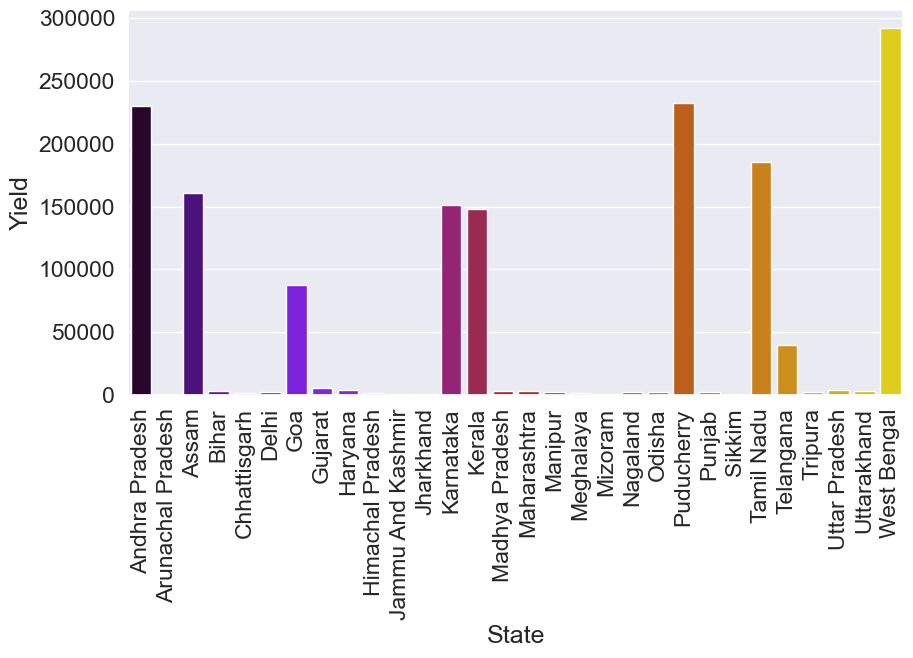

In [85]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (10,5))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

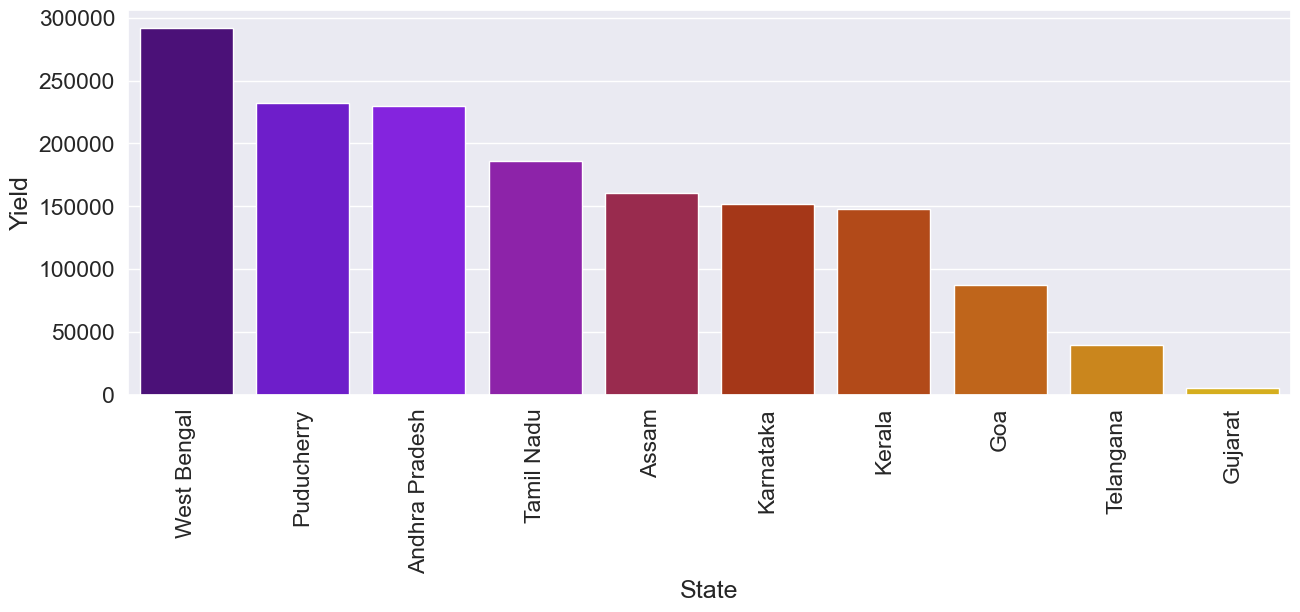

In [86]:
#Top 10 States by Total Yield
top_10_states = df_state_sort.head(10)
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()


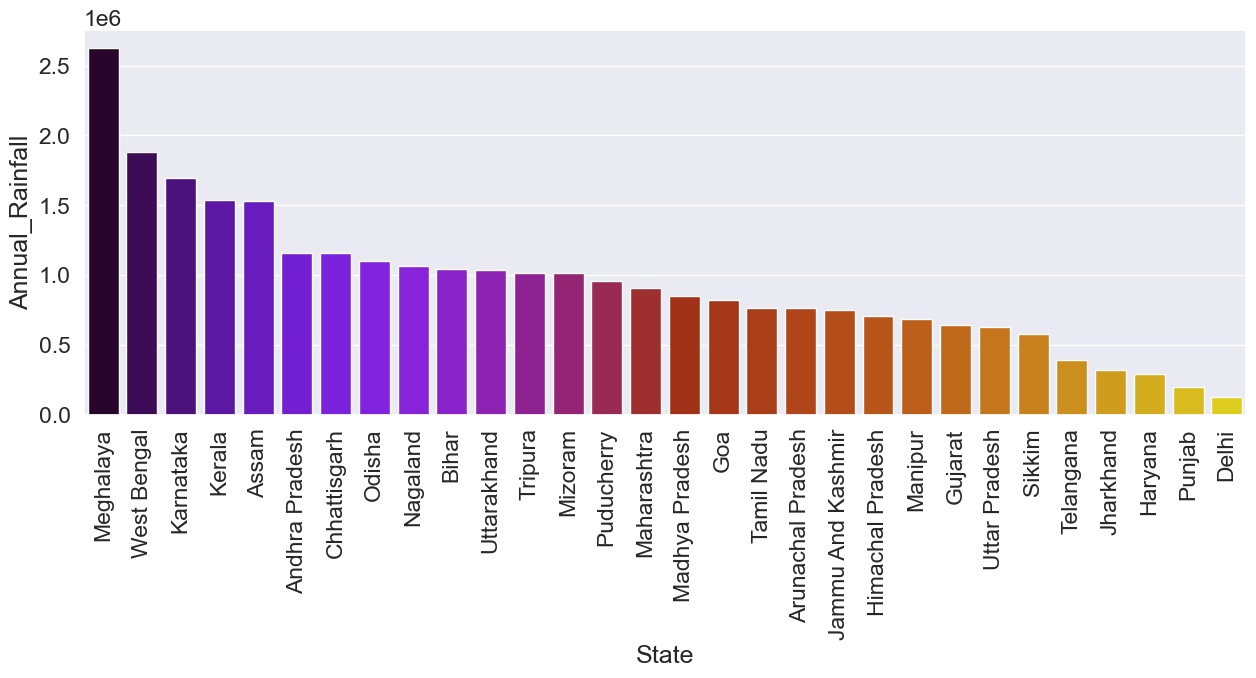

In [87]:
#Annual Rainfall per state
df_state_rainfall = df.groupby('State', as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x = df_state_rainfall['State'], y=df_state_rainfall['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

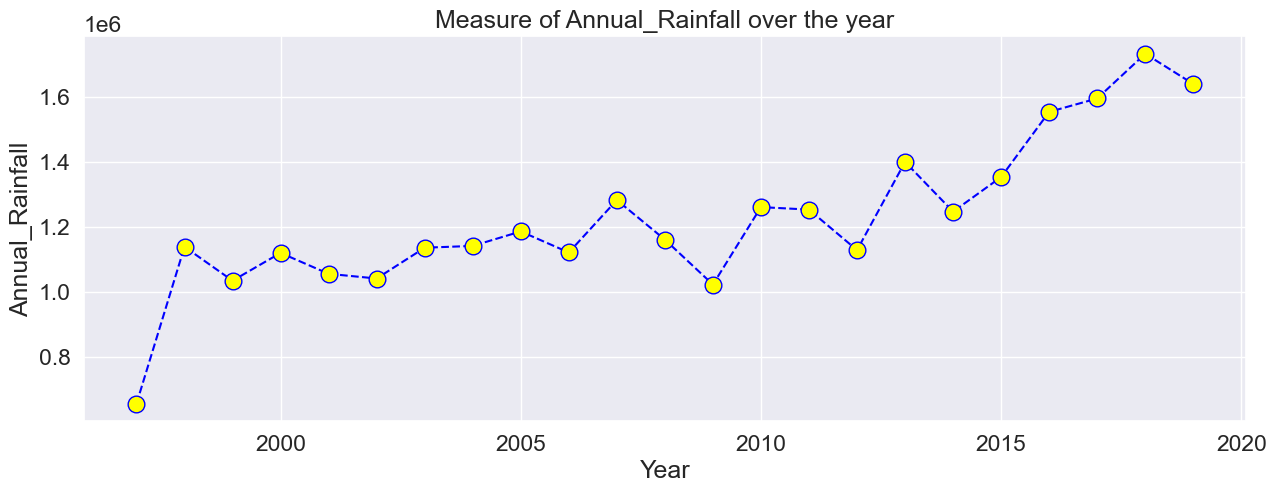

In [88]:
#Annual Rainfall trend over the year
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

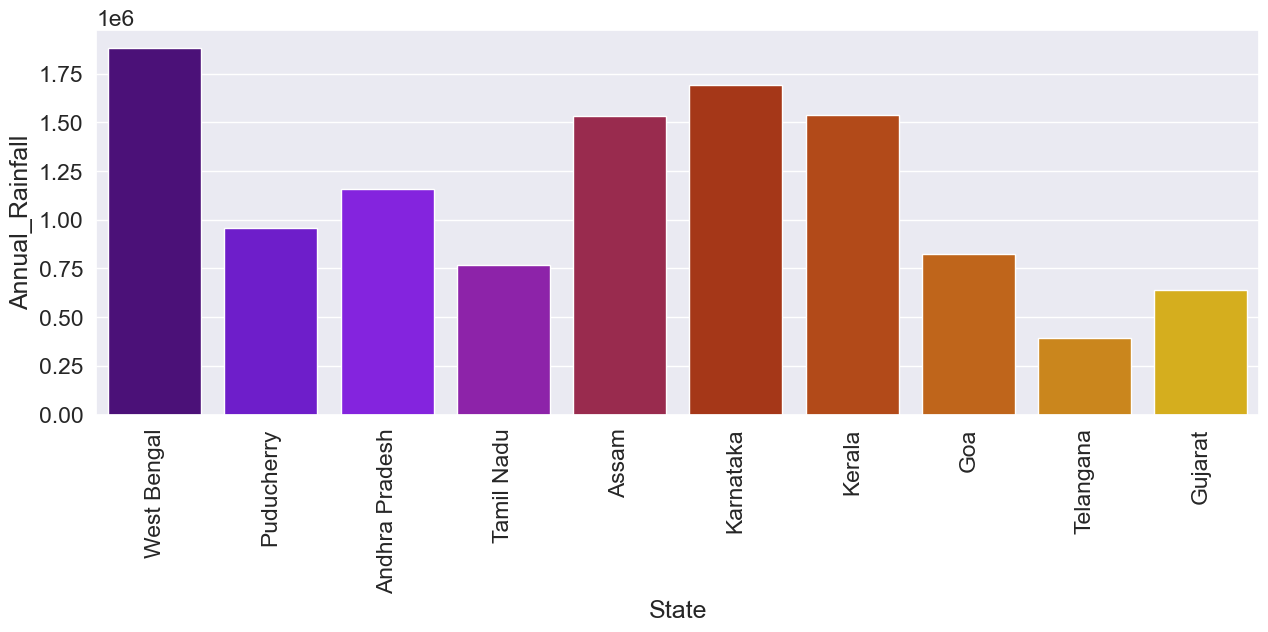

In [89]:
#Top 10 States by Total Annual Rainfall
df_state_sort = df.groupby('State', as_index=False)[['Yield', 'Annual_Rainfall']].sum().sort_values(by='Yield', ascending=False)
top_10_states = df_state_sort.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x=top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette='gnuplot')
plt.xticks(rotation=90)
plt.show()

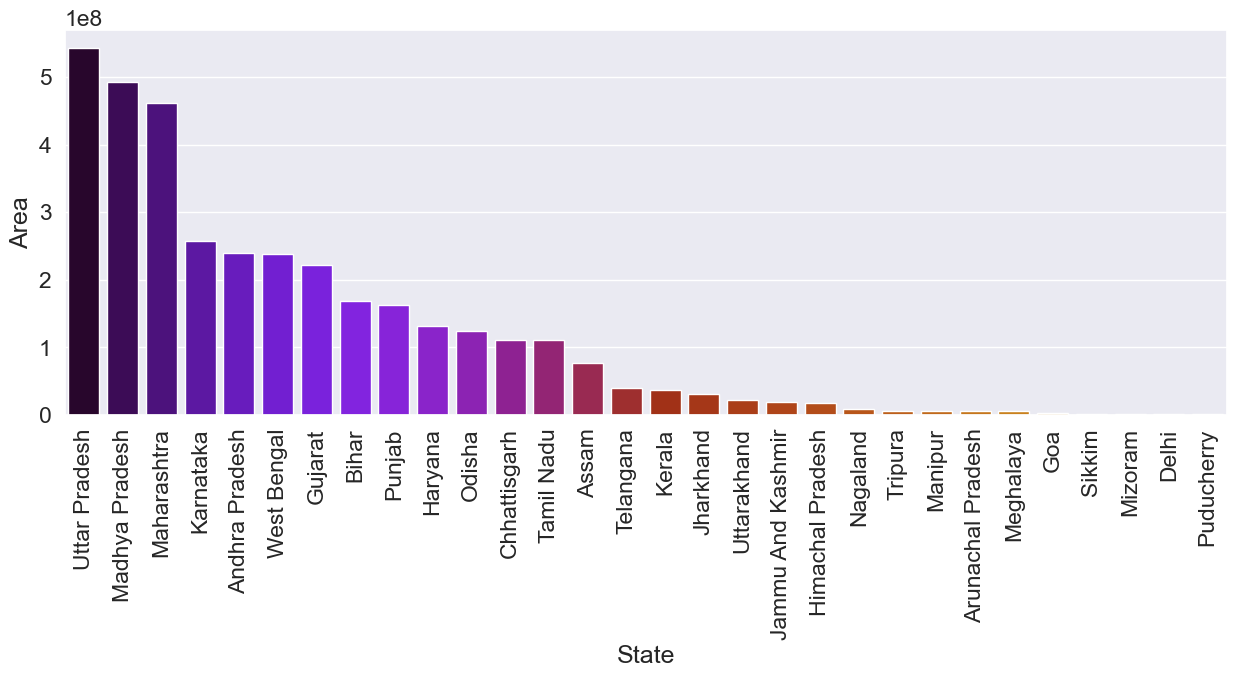

In [90]:
#Area per state
df_state_area = df.groupby('State', as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x=df_state_area['State'], y=df_state_area['Area'], palette='gnuplot')
plt.xticks(rotation=90)
plt.show()

In [91]:
#Production per state
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


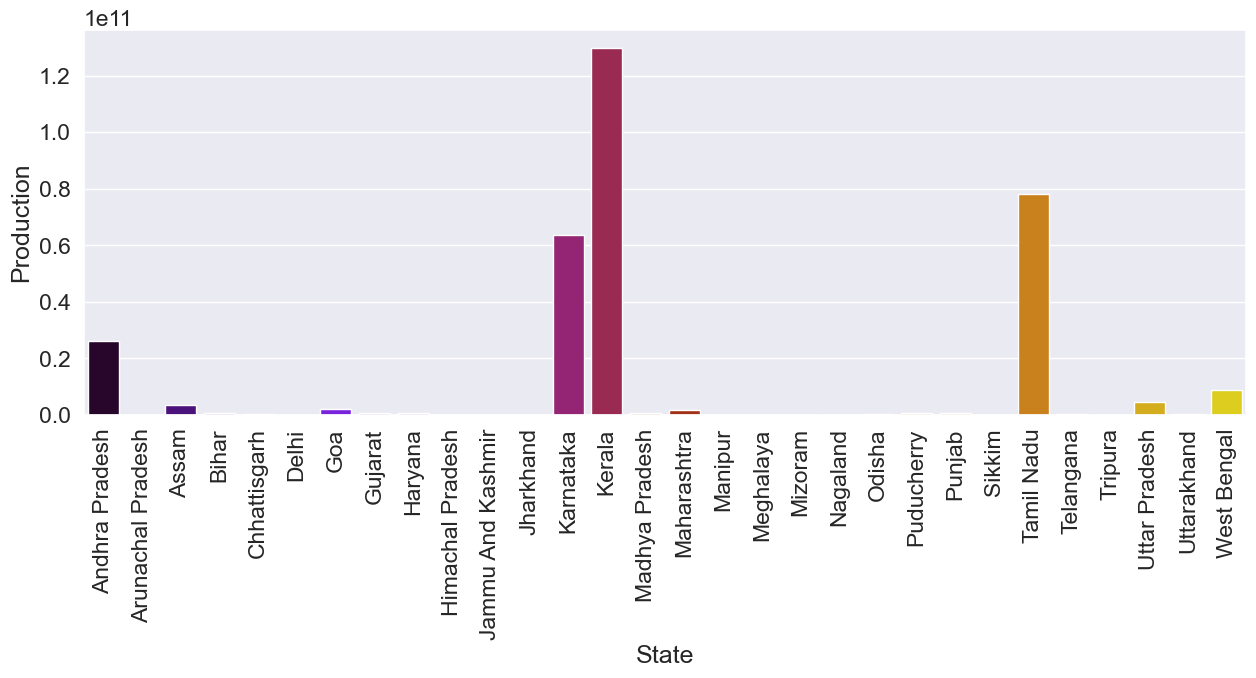

In [92]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

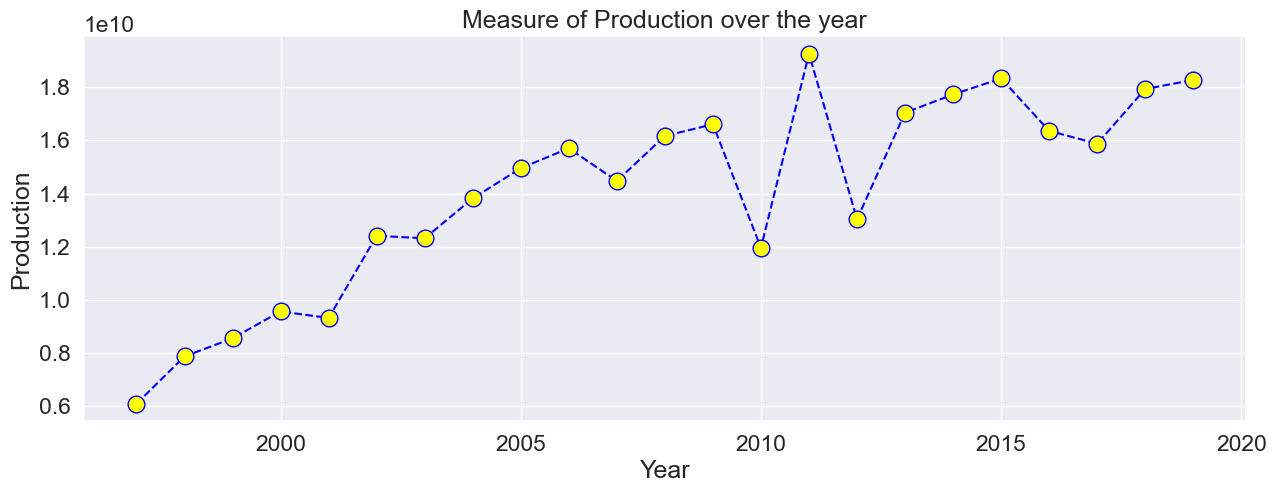

In [93]:
#Production trend over the year
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

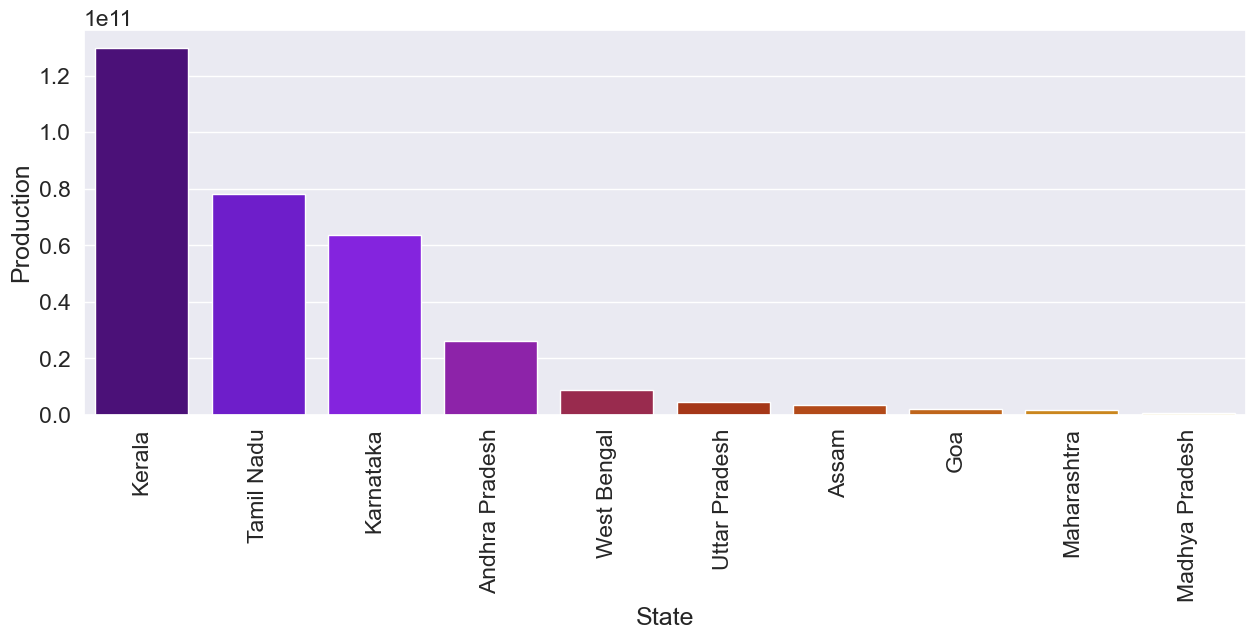

In [94]:
#Top 10 States by Total Production
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
top_10_states = df_state_sort.head(10)
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

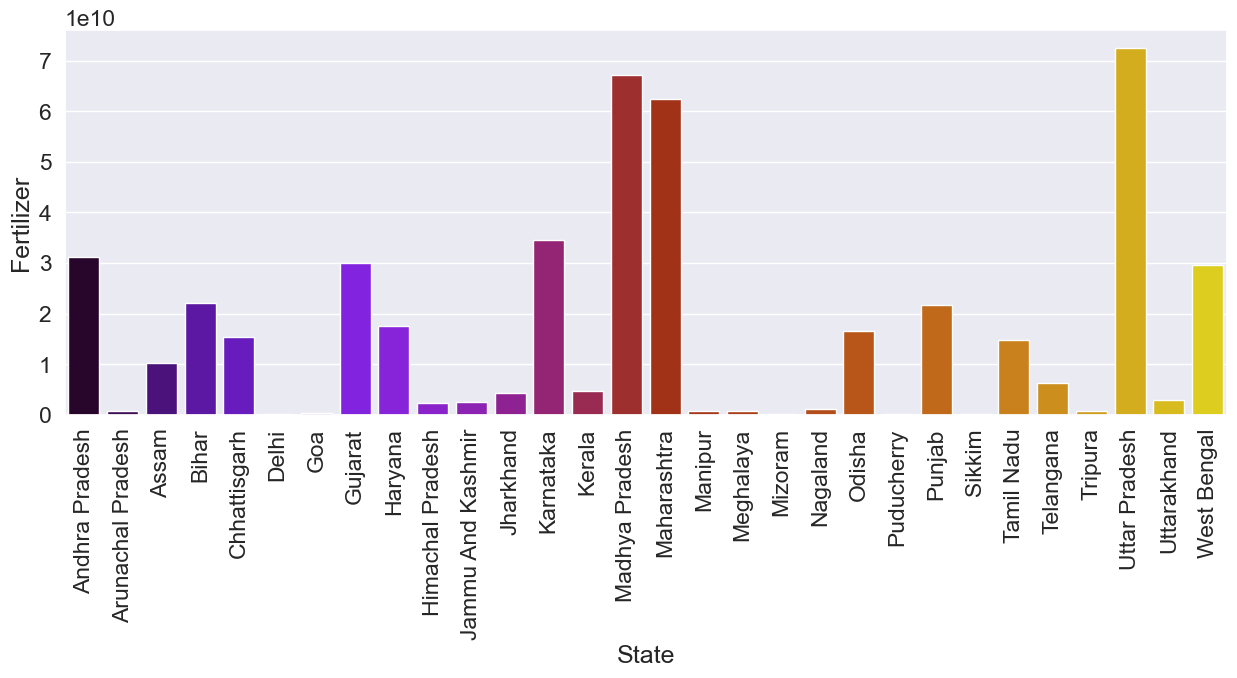

In [95]:
#Fertilizer per state
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

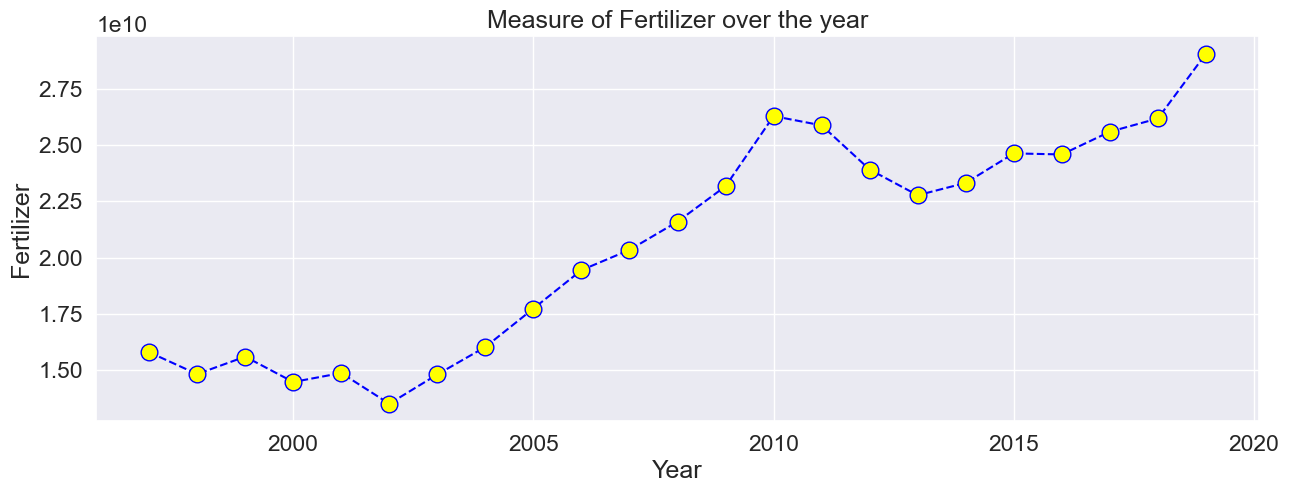

In [96]:
#Fertilizer trend over the year
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

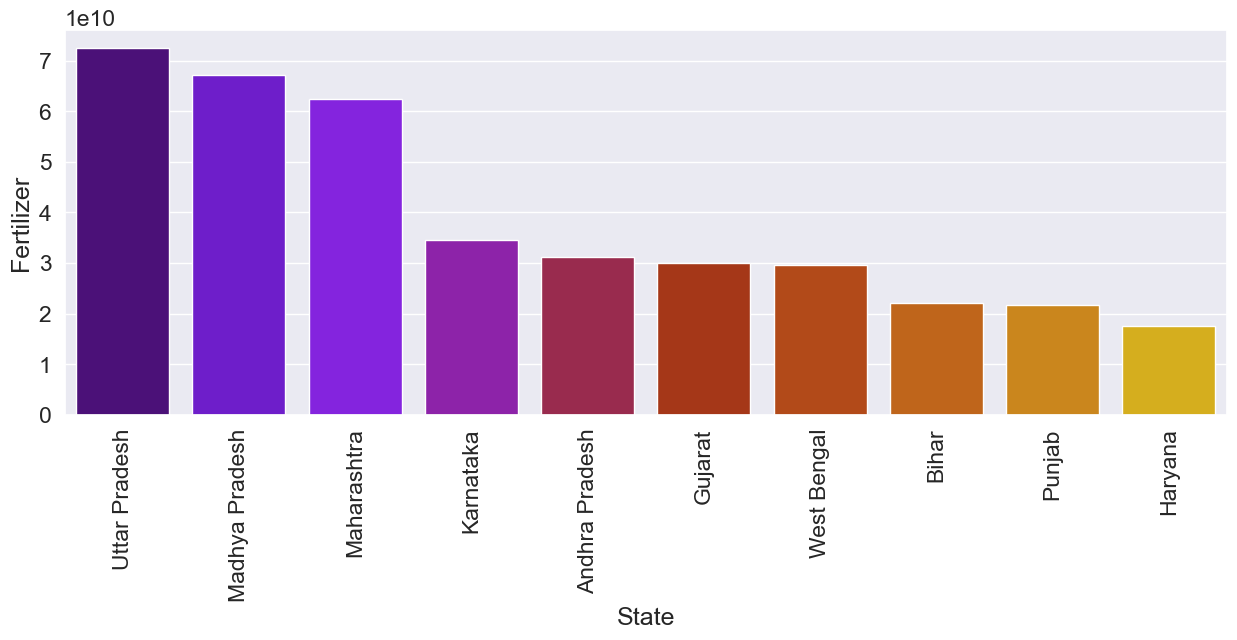

In [97]:
#Top 10 States by Total Fertilizer
top_10_states = df_state_sort.head(10)
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

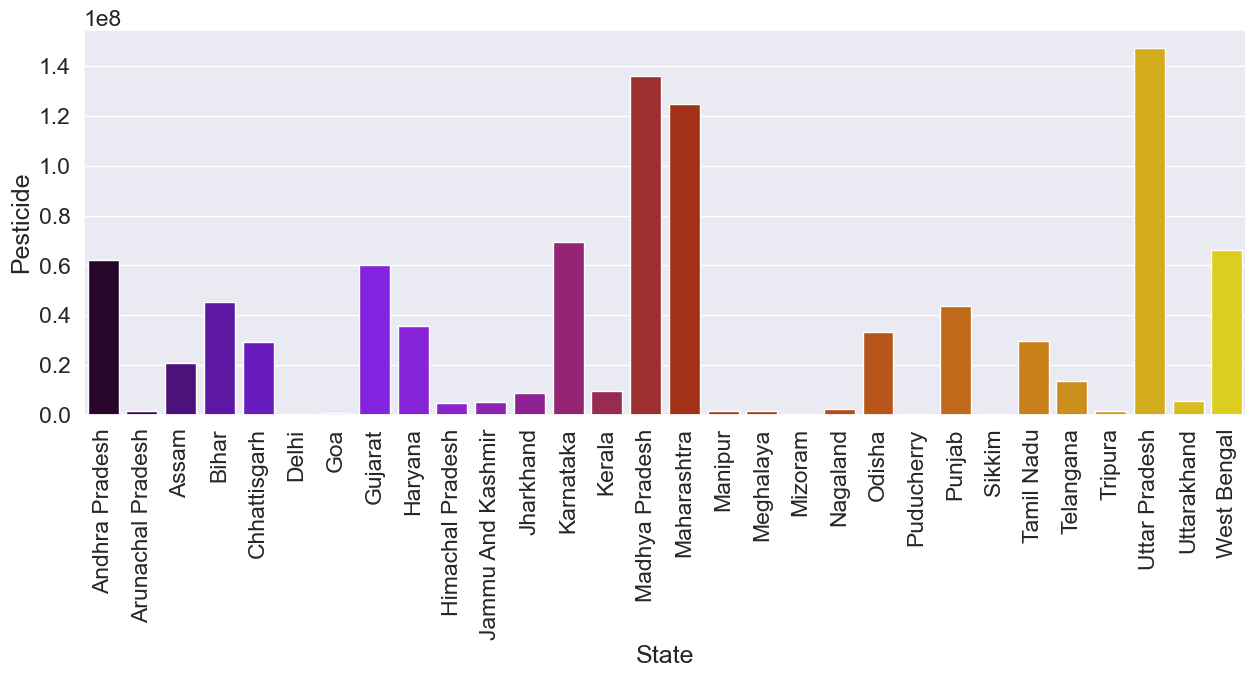

In [98]:
#Pesticide per state
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

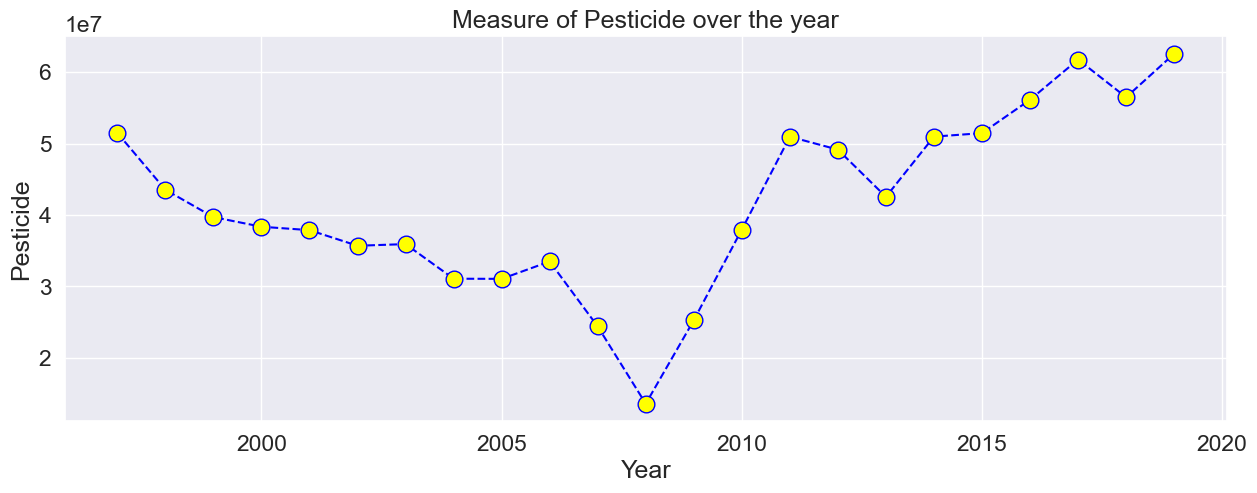

In [99]:
#Pesticide trend over the year
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

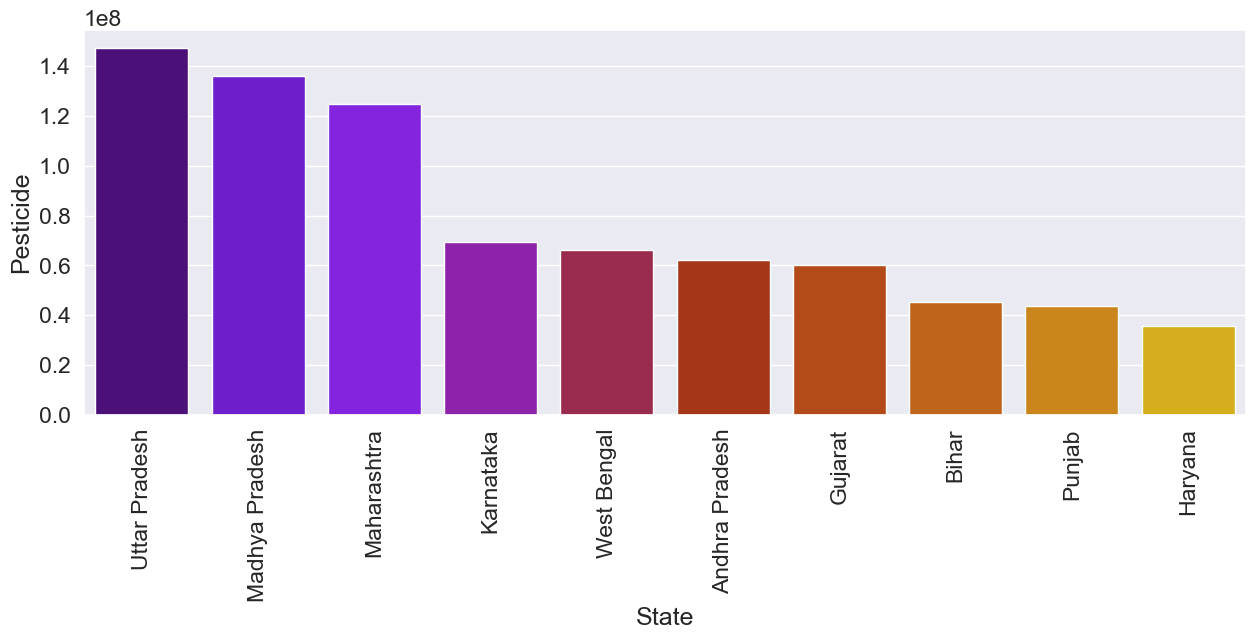

In [100]:
#Top 10 States by Total Pesticide
top_10_states = df_state_sort.head(10)
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [101]:
# Drop 'Area' and 'Production' columns
df = df.drop(['Area', 'Production'], axis=1)

One-Hot Encoding

In [102]:
category_columns = df.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [103]:
df = pd.get_dummies(df, columns = category_columns, drop_first=True)

In [104]:
df.shape

(19652, 93)

In [105]:
df.head()

,Crop_Year,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,2051.40,7024878.38,22882.34,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1997,2051.40,631643.29,2057.47,0.71,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1997,2051.40,75755.32,246.76,0.24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1997,2051.40,1870661.52,6093.36,5238.05,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1997,2051.40,165500.63,539.09,0.42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

**Split the data into dependent and independent variable**

In [106]:
x = df.drop(['Yield'], axis = 1)
y = df['Yield']

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [108]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 92)
y_train - >   (15721,)
x_test  - >   (3931, 92)
y_test  - >   (3931,)


In [109]:
#Store performance metrices in the list
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [110]:
#Create a function for evaluate model
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

**Linear Regression**

In [111]:
#Simple Linear Regression
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.83%, Adjusted R² = 84.74%, RMSE = 346.8866
Testing Data : R² = 81.87%, Adjusted R² = 81.44%, RMSE = 353.9153



In [112]:
#Ridge Regression
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.74%, RMSE = 346.9668
Testing Data : R² = 81.87%, Adjusted R² = 81.43%, RMSE = 353.9572



In [113]:
#Lasso Regression
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.81%, Adjusted R² = 84.72%, RMSE = 347.0942
Testing Data : R² = 81.86%, Adjusted R² = 81.42%, RMSE = 354.0458



In [114]:
#ElasticNet Regression
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 26.81%, Adjusted R² = 26.38%, RMSE = 761.9943
Testing Data : R² = 25.59%, Adjusted R² = 23.80%, RMSE = 716.9950



Tree-Based Models

In [115]:
#DecisionTree Regression
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 94.45%, Adjusted R² = 94.31%, RMSE = 195.8988



In [116]:
#Random Forest Regression
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.53%, Adjusted R² = 99.53%, RMSE = 61.1111
Testing Data : R² = 98.19%, Adjusted R² = 98.15%, RMSE = 111.7077



In [117]:
#AdaBoostRegression
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 95.68%, Adjusted R² = 95.66%, RMSE = 185.0692
Testing Data : R² = 94.14%, Adjusted R² = 94.00%, RMSE = 201.1355



In [118]:
#GradientBoosting Regression
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.07%, Adjusted R² = 99.06%, RMSE = 86.0406
Testing Data : R² = 97.93%, Adjusted R² = 97.88%, RMSE = 119.6274



**Instance-Based Learning**

In [119]:
#k-Nearest Neighbors
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 20.46%, Adjusted R² = 19.99%, RMSE = 794.3327
Testing Data : R² = -20.80%, Adjusted R² = -23.70%, RMSE = 913.5520



**Model comparison**

In [122]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "KNN",
    ]

In [123]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
5,Random Forest,99.53,99.53,61.11,98.19,98.15,111.71
7,Gradient Boost,99.07,99.06,86.04,97.93,97.88,119.63
4,Decision Tree,100.00,100.00,0.00,94.45,94.31,195.90
6,Ada Boost,95.68,95.66,185.07,94.14,94.00,201.14
0,Linear Regression,84.83,84.74,346.89,81.87,81.44,353.92
1,Ridge,84.82,84.74,346.97,81.87,81.43,353.96
2,Lasso,84.81,84.72,347.09,81.86,81.42,354.05
3,ElasticNet,26.81,26.38,761.99,25.59,23.80,717.00
8,KNN,20.46,19.99,794.33,-20.80,-23.70,913.55


In [124]:
# Print the most accurate model and its R2 score with precision
best_model = df_model_sort.iloc[0]
model_name = best_model['Algorithms']
r2_score_best = best_model['Testing Score R2']
print(f"Most accurate model: {model_name}")
print(f"Testing R2 Score: {r2_score_best:.2f}%")

Most accurate model: Random Forest
Testing R2 Score: 98.19%
